<a href="https://colab.research.google.com/github/JuliMillan/Diversidad_rol/blob/main/Copia_de_Diversidad_rol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import matplotlib.patches as mpatches
from scipy import stats
import folium
import scipy.stats as ss
import squarify
plt.rcParams.update({'font.size':14})
from google.colab import files

###Correr si no tenés montado GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Funciones útiles

In [ ]:
def normalidad(datos, alfa):
  k2, p = stats.normaltest(edades, nan_policy='omit')
  print("p = {:g}".format(p))
  if p < alpha:  # Hipótesis nula: la distribución proviene de una distribución Guassiana
    print("La distribución no es normal")
  else:
    print("La distribución parece normal")



def pie_plot(datos, explode, titulo, color=sns.color_palette('Set2')):
  d = datos.value_counts()
  pie, ax = plt.subplots(figsize=[10,6])
  labels=d.keys()
  plt.pie(x=d, autopct='%.1f%%', 
          explode=explode, labels=labels, 
          pctdistance=0.5, startangle=90,
          colors = color)
  ax.axis('equal')
  plt.title('{}'.format(titulo), fontsize=14, pad=30.0)
  plt.tight_layout()
  return plt.show()


def heat_map(columna_1, columna_2):
  matriz = pd.crosstab(index=columna_1, columns=columna_2)
  fig = sns.heatmap(matriz)
  return matriz, fig

def tree_plot(datos, columna, titulo):
  d = pd.DataFrame(datos.value_counts().reset_index())
  d.columns = [columna, 'conteo']
  color=sns.color_palette("inferno")
  fig, ax = plt.subplots(figsize=(10, 6))
  squarify.plot(sizes=d['conteo'], label=d[columna], alpha=.7, color=color)
  plt.axis('off')
  plt.title('{}'.format(titulo), fontsize=14)
  return plt.show()

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

##Exploramos los datos

In [ ]:
archivo = "/content/drive/MyDrive/Copia de Diversidad sexual y de género en el mundo de los juegos de rol (respuestas) - Respuestas de formulario 1.csv"
df = pd.read_csv(archivo)
df.head(3)

,Marca temporal,Qué edad tenés?,Qué juego/s jugás?,Participás como,Con qué género te identificás?,"En relación al género que se te asignó al nacer, te considerás",Cuál es tu orientación sexual?,Alguna vez sufriste discriminación (como jugadorx) por tu género u orientación sexual durante una partida?,Presenciaste algún tipo de discriminación hacia otra persona?,"En caso de haber sufrido/presenciado casos de discriminación, reaccionaste de alguna manera?",Tus grupos de juego normalmente están conformados por,En qué país naciste?,En qué país vivís?,"Algo que quieras agregar, contar, comentar, criticar?"
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina,NaN
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Marca temporal                                                                                               159 non-null    object 
 1   Qué edad tenés?                                                                                              149 non-null    float64
 2   Qué juego/s jugás?                                                                                           158 non-null    object 
 3   Participás como                                                                                              158 non-null    object 
 4   Con qué género te identificás?                                

In [ ]:
df.columns = [
              'fecha', 'edad', 'juegos', 'rol', 'genero', 'identidad', 'sexualidad', 
              'discriminacion_personal', 'discriminacion_otre', 'reaccion',
              'grupo', 'nacimiento', 'residencia', 'comentario'
              ]

df.head(3)

,fecha,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia,comentario
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina,NaN
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina,NaN


In [ ]:
df1 = df.iloc[:,1:13]
df1.head(3)

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


##Edades y género

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

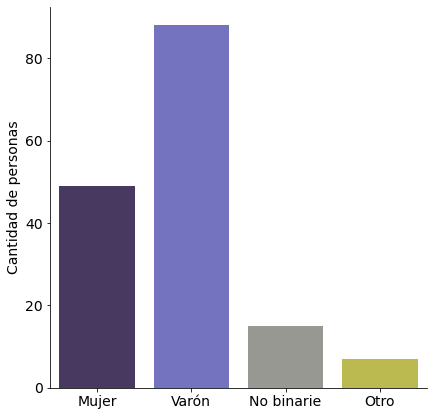

In [ ]:
figure = sns.catplot(x="genero", kind="count", palette="gist_stern", 
                     data=df1, order=['Mujer', 'Varón', 'No binarie','Otro'], height=6)
plt.xlabel('')
plt.ylabel('Cantidad de personas')
#plt.savefig("1.jpg",bbox_inches='tight')
#files.download("1.jpg") 
plt.show()

In [ ]:
edades = (df1['edad'])
#print(edades)
print(edades.shape)
#print(type(edades))
print(edades.describe())
edades_np = edades.dropna()
edades_np = edades_np.to_numpy()
#print(type(edades_np))
print(edades_np.mean())


(159,)
count    149.000000
mean      30.221477
std        6.740204
min       16.000000
25%       26.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: edad, dtype: float64
30.221476510067113


In [ ]:
mediana = (edades.median())
print('La edad más representada es {} años, con {} personas.'.format(int(mediana), np.sum([df1['edad']==mediana])))

La edad más representada es 30 años, con 16 personas.


In [ ]:
edad_maxima = int(edades.max())
edad_minima = int(edades.min())
print('Edad máxima: ', edad_maxima ,'\nEdad mínima: ', edad_minima)

Edad máxima:  51 
Edad mínima:  16


In [ ]:
alpha = 1e-3
normalidad(edades_np, alpha)

p = 0.132478
La distribución parece normal


In [ ]:
edades_genero = df1[['edad', 'genero']]
#edades_genero.head(3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

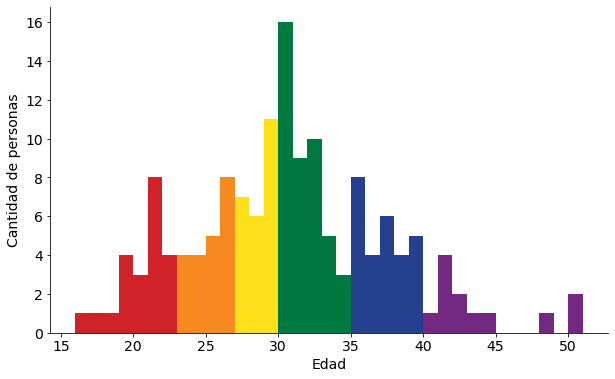

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
bin=(edad_maxima-edad_minima)

N, bins, patches = ax.hist(edades, bins=bin)

for i in range(0,7):
    patches[i].set_facecolor('#D12229')
for i in range(7,11):    
    patches[i].set_facecolor('#F68A1E')
for i in range(11,16):
    patches[i].set_facecolor('#FDE01A')
for i in range(14,19):
    patches[i].set_facecolor('#007940')
for i in range(19,24):    
    patches[i].set_facecolor('#24408E')
for i in range(24, len(patches)):
    patches[i].set_facecolor('#732982')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
#plt.savefig("2.jpg",bbox_inches='tight')
#files.download("2.jpg") 

plt.show()

In [ ]:
edades_m = edades_genero[edades_genero['genero']=='Mujer'].dropna()
edades_v = edades_genero[edades_genero['genero']=='Varón'].dropna()
edades_nb = edades_genero[edades_genero['genero']=='No binarie'].dropna()
edades_o = edades_genero[edades_genero['genero']=='Otro'].dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

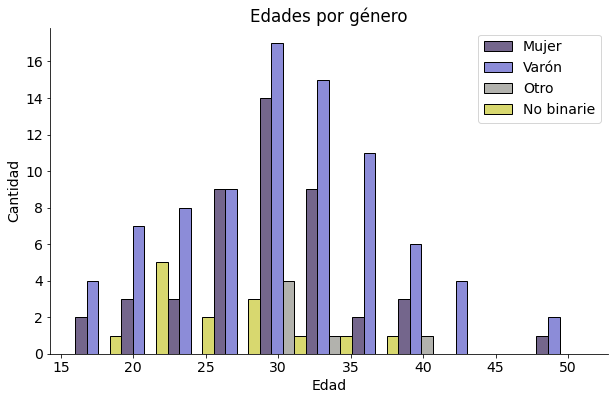

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.histplot(data=edades_genero, x="edad", hue="genero", 
                      multiple="dodge", palette='gist_stern')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Edades por género')
fig.get_legend().set_title(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig("3.jpg",bbox_inches='tight')
#files.download("3.jpg") 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

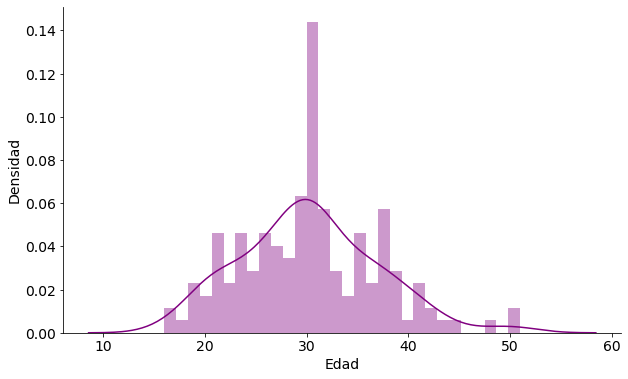

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.distplot(edades_genero['edad'], bins=30, color='purple')
plt.xlabel('Edad')
plt.ylabel('Densidad')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig("4.jpg",bbox_inches='tight')
#files.download("4.jpg") 
plt.show()

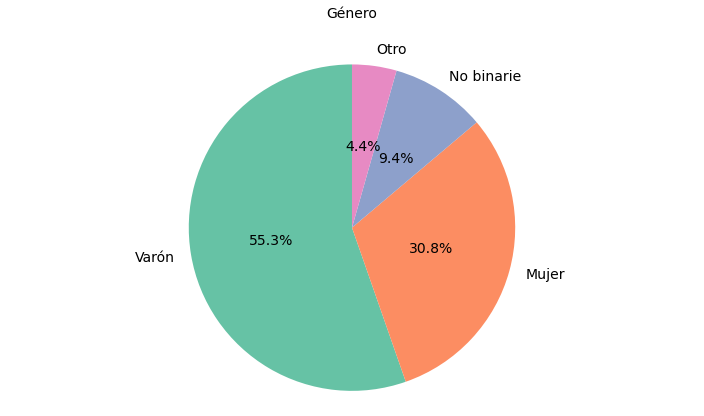

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
pie_plot(df1['genero'], np.zeros(4), 'Género')
#plt.savefig("5.jpg",bbox_inches='tight')
#files.download("5.jpg") 

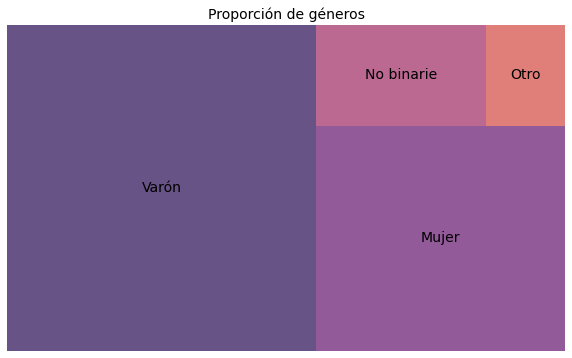

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
tree_plot(df1['genero'], 'genero', 'Proporción de géneros')
#plt.savefig("6.jpg",bbox_inches='tight')
#files.download("6.jpg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

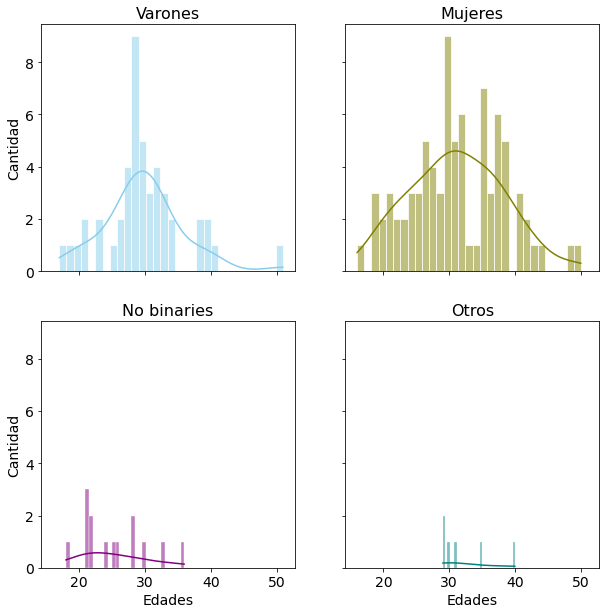

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
bins=31

with sns.axes_style("darkgrid"):
  sns.histplot(edades_m, x="edad", kde=True, color="skyblue", ax=axs[0, 0], bins=bins).set_title('Varones', size=16)
  sns.histplot(edades_v, x="edad", kde=True, color="olive", ax=axs[0, 1], bins=bins).set_title('Mujeres', size=16)
  sns.histplot(edades_nb, x="edad", kde=True, color="purple", ax=axs[1, 0], bins=bins).set_title('No binaries', size=16)
  sns.histplot(edades_o, x="edad", kde=True, color="teal", ax=axs[1, 1],bins=bins).set_title('Otros', size=16)

  plt.setp(axs[-1, :], xlabel='Edades')
  plt.setp(axs[:, 0], ylabel='Cantidad')
  #plt.savefig("7.jpg",bbox_inches='tight')
  #files.download("7.jpg") 
  plt.show()

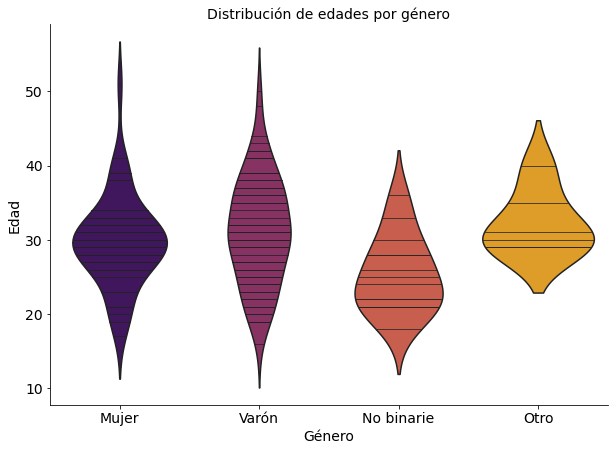

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x=df1.genero, y=df1.edad, palette="inferno", inner='stick', order=['Mujer', 'Varón', 'No binarie','Otro'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribución de edades por género', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()
#plt.savefig("8.jpg",bbox_inches='tight')
#files.download("8.jpg") 

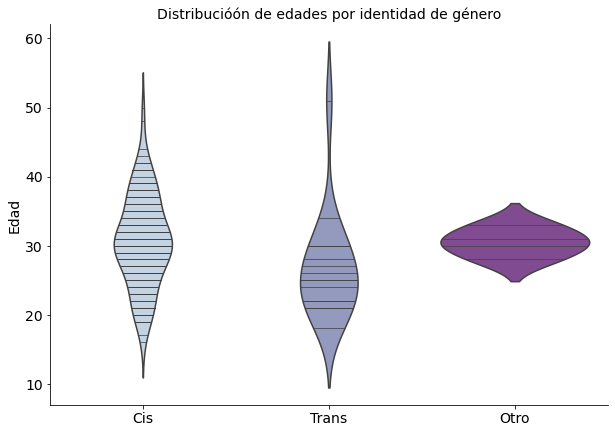

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
f, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x=df1.identidad, y=df1.edad, palette="BuPu", inner='stick')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribucióón de edades por identidad de género', fontsize=14)
plt.xlabel('')
plt.ylabel('Edad')
plt.show()
#plt.savefig("9.jpg",bbox_inches='tight')
#files.download("9.jpg") 

##Juegos

In [ ]:
type(df['juegos'])

pandas.core.series.Series

In [ ]:
juegos1 = df['juegos'].dropna()
type(juegos1)

pandas.core.series.Series

In [ ]:
juegos = [j.split(';') for j in juegos1]
flat_list = [item for sublist in juegos for item in sublist]
juegos_ = [i.split(', ') for i in flat_list]
otra_vez = [item for sublist in juegos_ for item in sublist]
print(len(otra_vez))

391


In [ ]:
#Cuento la cantidad de veces que aparece un juego
contador = Counter(otra_vez)
#Uso los juegos que más aparecen para armar un dataframe
mas_comunes = contador.most_common(11)
juegos_mas_comunes = pd.DataFrame(mas_comunes)
juegos_mas_comunes
print(mas_comunes)

[('Dungeons & Dragons 5E', 98), ('La Llamada de Cthulhu', 42), ('Vampiros', 38), ('Pathfinder', 38), ('Dungeons & Dragons 3.5', 35), ('Hombre Lobo', 9), ('GURPS', 9), ('PbtA', 8), ('Homebrew', 5), ('Warhammer', 5), ('Indies', 5)]


In [ ]:
#labels = [item[0] for item in mas_comunes]
#cantidad = [item[1] for item in mas_comunes]
#nbars = len(mas_comunes)

#plt.bar(np.arange(nbars), cantidad, tick_label=labels)
#plt.show()

In [ ]:
#Armo un dataframe con los juegos más comunes y la cantidad de veces que aparecen
datos = pd.DataFrame(mas_comunes)
datos.columns=['juego', 'cantidad']
datos

,juego,cantidad
0,Dungeons & Dragons 5E,98
1,La Llamada de Cthulhu,42
2,Vampiros,38
3,Pathfinder,38
4,Dungeons & Dragons 3.5,35
5,Hombre Lobo,9
6,GURPS,9
7,PbtA,8
8,Homebrew,5
9,Warhammer,5


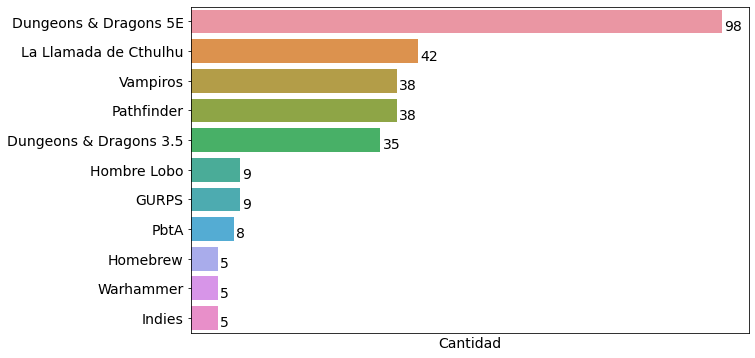

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='cantidad', y='juego', data=datos)
#Para mostrar los valores a la derecha de las barras
for p in ax.patches:
  _x = p.get_x() + p.get_width() + .4
  _y = p.get_y() + p.get_height()
  value = int(p.get_width())
  ax.text(_x, _y, value, ha="left", va='bottom')
plt.xticks([])
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

In [ ]:
#Agrego al dataframe una columna con los porcentajes
total = len(otra_vez)
datos['porcentaje'] = ((datos['cantidad']*100)/total)
datos

,juego,cantidad,porcentaje
0,Dungeons & Dragons 5E,98,25.063939
1,La Llamada de Cthulhu,42,10.741688
2,Vampiros,38,9.718670
3,Pathfinder,38,9.718670
4,Dungeons & Dragons 3.5,35,8.951407
5,Hombre Lobo,9,2.301790
6,GURPS,9,2.301790
7,PbtA,8,2.046036
8,Homebrew,5,1.278772
9,Warhammer,5,1.278772


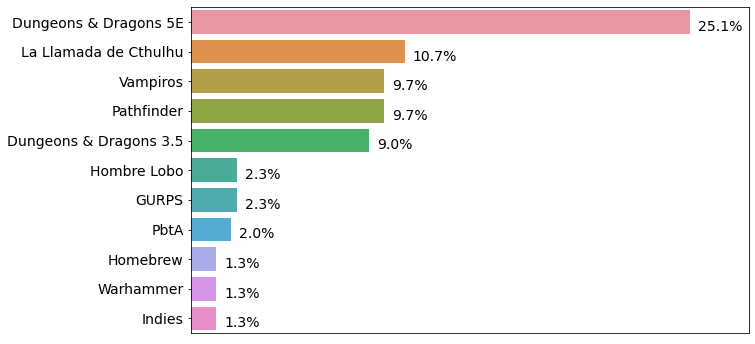

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='porcentaje', y='juego', data=datos)
#Para mostrar los valores a la derecha de las barras horizontales, en formato porcentaje
for p in ax.patches:
  _x = p.get_x() + p.get_width() + .4
  _y = p.get_y() + p.get_height()
  value = "{:.1f}%".format(p.get_width())
  ax.text(_x, _y, value, ha="left", va='bottom')
plt.xticks([])
plt.xlim([0,28])
plt.xlabel('')
plt.ylabel('')
plt.show()
#plt.savefig("9.jpg",bbox_inches='tight')
#files.download("9.jpg") 

##Identidad de género

In [ ]:
df1.head()

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
3,32.0,"Dungeons & Dragons 3.5, Homebrew",Jugadorx,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
4,30.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5,...",Ambos,Varón,NaN,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


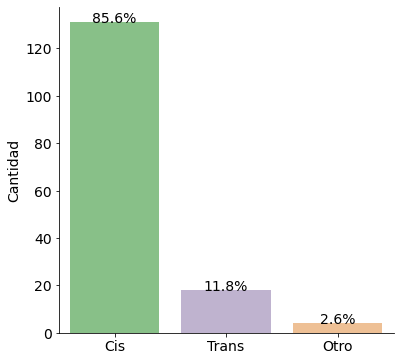

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
total=df1['identidad'].count()
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(x="identidad", data=df1, palette='Accent')
#Para mostrar los valores sobre las barras verticales
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = "{:.1f}%".format((int(p.get_height())*100)/total)
  ax.text(_x, _y, value, ha="center") 
plt.xlabel('')
plt.ylabel('Cantidad')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
#plt.savefig("10.jpg",bbox_inches='tight')
#files.download("10.jpg") 

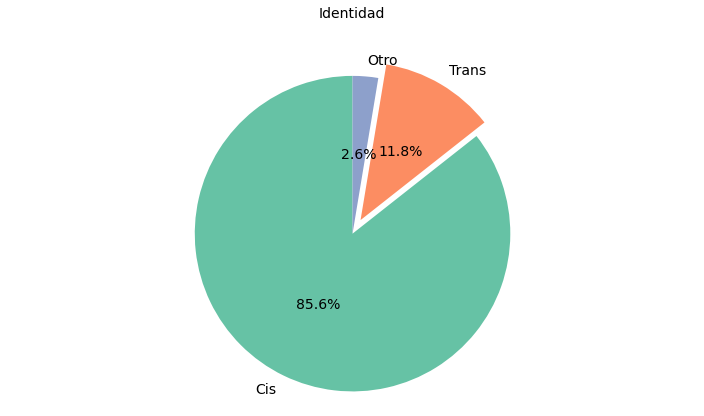

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
pie_plot(df1['identidad'],[0,.1,0], 'Identidad')
#plt.savefig("11.jpg",bbox_inches='tight')
#files.download("11.jpg") 

##Sexualidad

In [ ]:
df1['sexualidad'].value_counts()

Heterosexual    82
Bisexual        44
Homosexual      12
Pansexual        7
Asexual          7
Otro             7
Name: sexualidad, dtype: int64

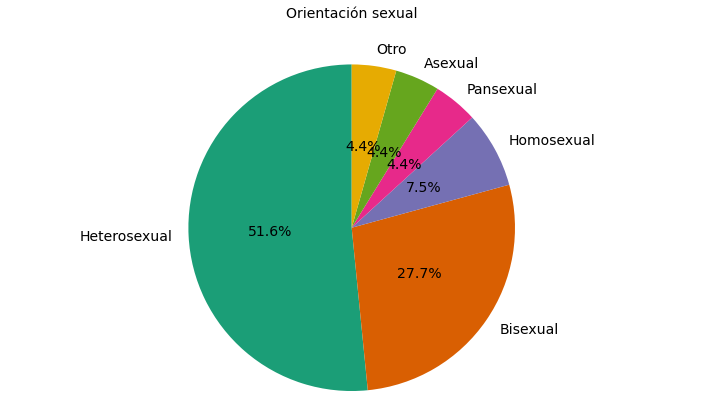

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
pie_plot(df1['sexualidad'], np.zeros(6), 'Orientación sexual', sns.color_palette("Dark2"))
#plt.savefig("12.jpg",bbox_inches='tight')
#files.download("12.jpg") 

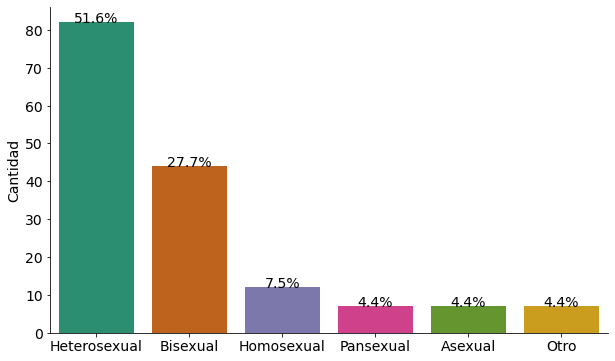

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
total=df1['sexualidad'].count()
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="sexualidad", data=df1, palette='Dark2', order=df1['sexualidad'].value_counts().index)
#Para mostrar los valores sobre las barras verticales
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:.1f}%'.format(int(p.get_height()*100)/total)
  ax.text(_x, _y, value, ha="center") 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('')
plt.ylabel('Cantidad')
plt.show()
#plt.savefig("13.jpg",bbox_inches='tight')
#files.download("13.jpg") 

##Discriminación

In [ ]:
df1.head()

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
3,32.0,"Dungeons & Dragons 3.5, Homebrew",Jugadorx,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
4,30.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5,...",Ambos,Varón,NaN,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


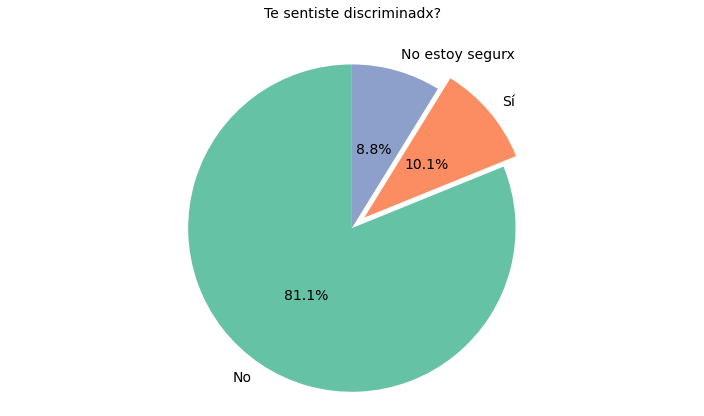

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
pie_plot(df1['discriminacion_personal'], [0,.1,0], 'Te sentiste discriminadx?')
#plt.savefig("14.jpg",bbox_inches='tight')
#files.download("14.jpg") 

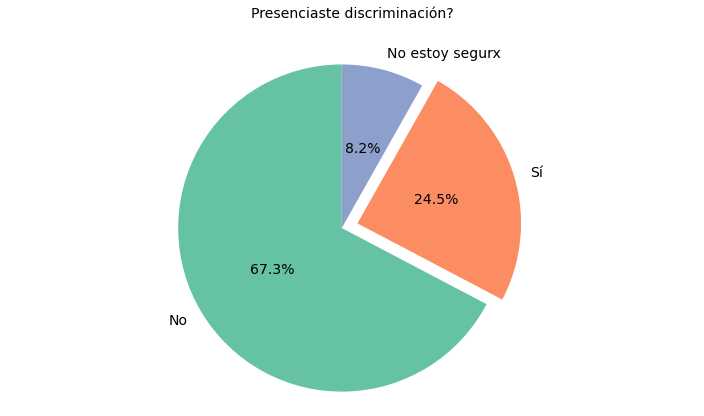

In [ ]:
pie_plot(df1['discriminacion_otre'], [0,.1,0], 'Presenciaste discriminación?')

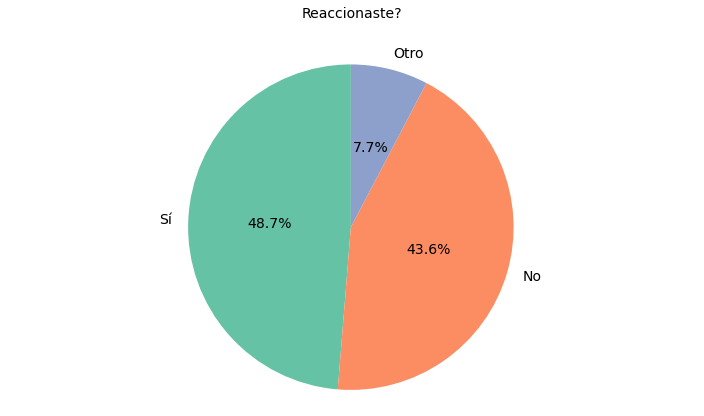

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
pie_plot(df1['reaccion'], np.zeros(3), 'Reaccionaste?')
#plt.savefig("15.jpg",bbox_inches='tight')
#files.download("15.jpg") 
#df1.reaccion.str.get_dummies().sum().plot.pie(label='Reaccionaste?', autopct='%1.0f%%')

##Grupos

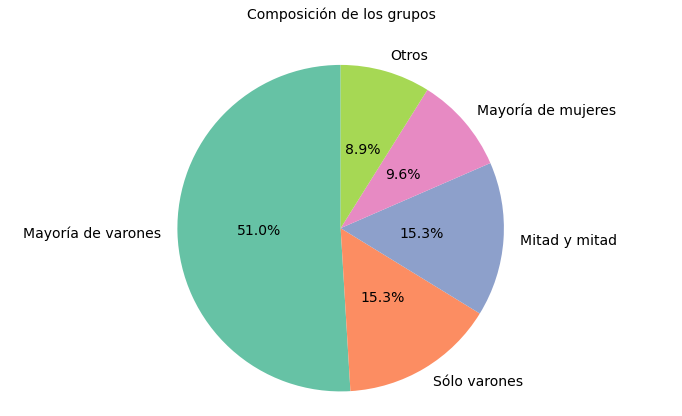

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
pie_plot(df1['grupo'], np.zeros(5), 'Composición de los grupos')
#plt.savefig("16.jpg",bbox_inches='tight')
#files.download("16.jpg") 

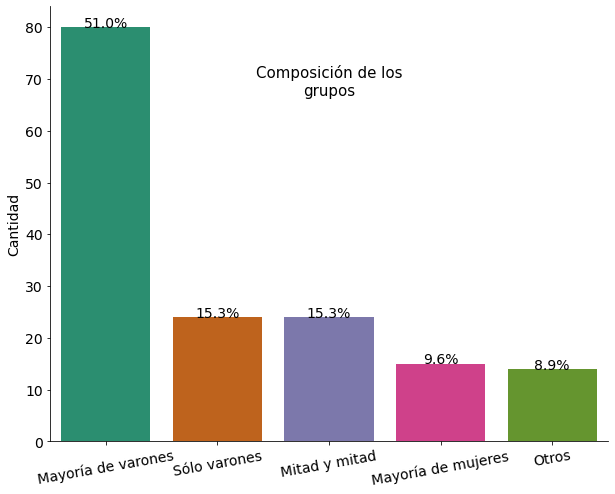

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
total=df1['grupo'].count()
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x="grupo", data=df1, palette='Dark2', order=df1['grupo'].value_counts().index)
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:.1f}%'.format(int(p.get_height()*100)/total)
  ax.text(_x, _y, value, ha="center") 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('')
plt.xticks(rotation=10, ha='center')
plt.ylabel('Cantidad')
#Personalizar la localización del título
ax.set_title('Composición de los\ngrupos', fontsize=15, loc='center', y=0.9,  pad= -45)
plt.show()
#plt.savefig("17.jpg",bbox_inches='tight')
#files.download("17.jpg") 

##Correlaciones

In [ ]:
df1.head()

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
3,32.0,"Dungeons & Dragons 3.5, Homebrew",Jugadorx,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
4,30.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5,...",Ambos,Varón,NaN,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


In [ ]:
cramers_v(df1['genero'], df1['discriminacion_personal'])

0.2486237258117704

In [ ]:
cramers_v(df1['genero'], df1['discriminacion_otre'])

0.050284853135184854

In [ ]:
cramers_v(df1['sexualidad'], df1['discriminacion_personal'])

0.1803460750466497

In [ ]:
cramers_v(df1['identidad'], df1['discriminacion_personal'])

0.15483807526575388

In [ ]:
# importing the required function
from scipy.stats import chi2_contingency

CrosstabResult=pd.crosstab(index=df1['genero'],columns=df1['discriminacion_personal'])
print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

discriminacion_personal  No  No estoy segurx  Sí
genero                                          
Mujer                    35                8   6
No binarie               11                1   3
Otro                      2                2   3
Varón                    81                3   4
The P-Value of the ChiSq Test is: 0.0002822621017351442


In [ ]:
ctb=CrosstabResult.sort_values(by=['No'])
ctb

discriminacion_personal,No,No estoy segurx,Sí
genero,,,
Otro,2,2,3
No binarie,11,1,3
Mujer,35,8,6
Varón,81,3,4


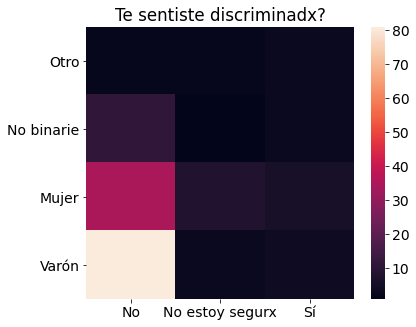

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(ctb)
plt.title('Te sentiste discriminadx?')
plt.ylabel('')
plt.xlabel('')
plt.show()

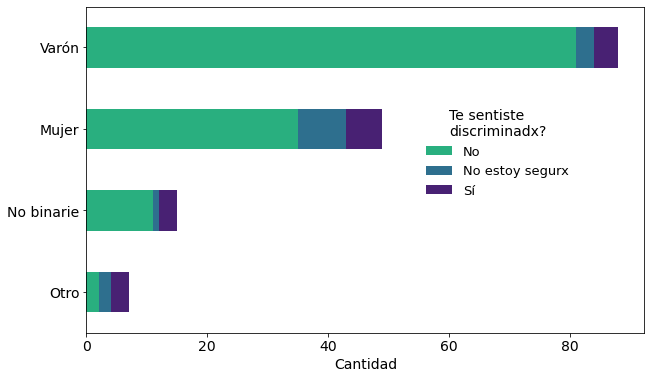

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
colors = ['#29af7f','#2e6f8e','#482173']
fig = ctb.plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Te sentiste\ndiscriminadx?', title_fontsize=14, loc=(.6,.4), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()
#plt.savefig("18.jpg",bbox_inches='tight')
#files.download("18.jpg") 

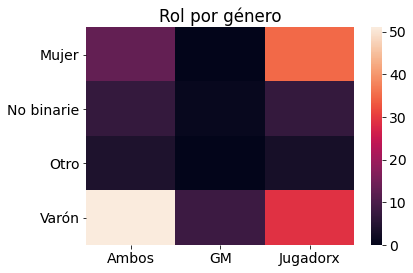

In [ ]:
heat_map(df1['genero'], df1['rol'])
plt.title('Rol por género')
plt.ylabel('')
plt.xlabel('')
plt.show()

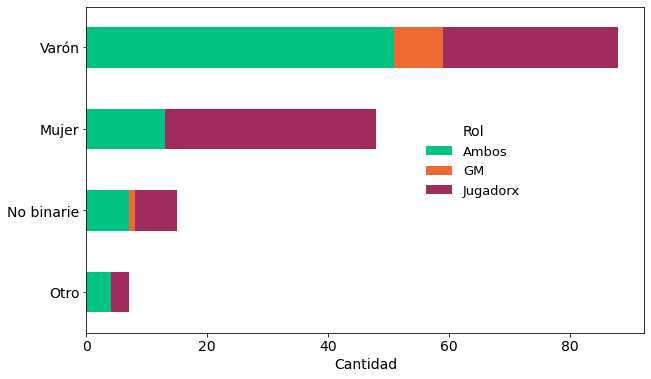

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
colors = ['#03c383','#ef6a32','#a12a5e']
ct=(pd.crosstab(index=df1['genero'],columns=df1['rol'])).sort_values(by=['Ambos'])
fig = ct.plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Rol', title_fontsize=14, loc=(.6,.4), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()
#plt.savefig("19.jpg",bbox_inches='tight')
#files.download("19.jpg") 

In [ ]:
# importing the required function
from scipy.stats import chi2_contingency

CrosstabResult=pd.crosstab(index=df1['genero'],columns=df1['grupo'])
#print(CrosstabResult)
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
CrosstabResult

The P-Value of the ChiSq Test is: 3.769001695129199e-05


grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
genero,,,,,
Mujer,7,27,9,4,1
No binarie,4,5,0,5,1
Otro,0,4,1,2,0
Varón,4,44,14,3,22


In [ ]:
ct=(pd.crosstab(index=df1['identidad'],columns=df1['grupo'])).sort_values(by=['Mayoría de varones'], ascending=False)
ct

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
identidad,,,,,
Cis,8,67,22,10,22
Trans,7,6,1,4,0
Otro,0,4,0,0,0


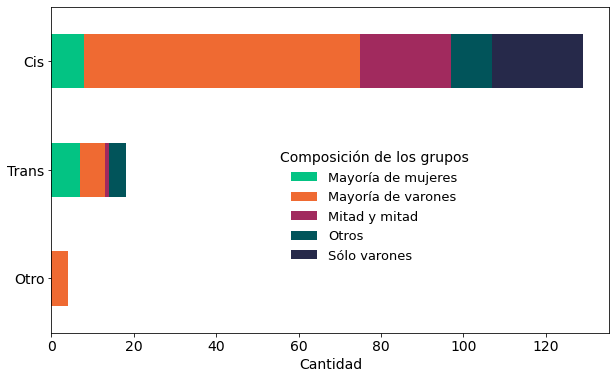

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
colors = ['#03c383','#ef6a32','#a12a5e', '#01545a', '#26294a']
ct=(pd.crosstab(index=df1['identidad'],columns=df1['grupo'])).sort_values(by=['Mayoría de varones'])
fig = ct.plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Composición de los grupos', title_fontsize=14, loc=(.4,.2), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()
#plt.savefig("20.jpg",bbox_inches='tight')
#files.download("20.jpg") 

(grupo      Mayoría de mujeres  Mayoría de varones  ...  Otros  Sólo varones
 identidad                                          ...                     
 Cis                         8                  67  ...     10            22
 Otro                        0                   4  ...      0             0
 Trans                       7                   6  ...      4             0
 
 [3 rows x 5 columns],
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98ade33c50>)

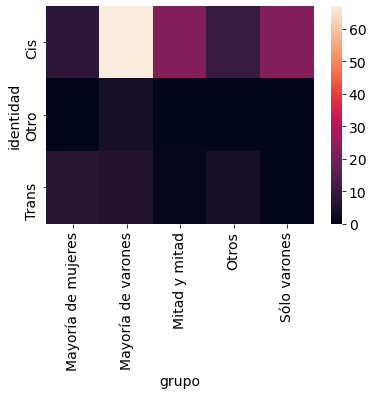

In [ ]:
heat_map(df1['identidad'], df1['grupo'])

In [ ]:
b = df1[['genero', 'grupo']]
b.head(3)
c = pd.crosstab(index=b['genero'],columns=b['grupo'])
c

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
genero,,,,,
Mujer,7,27,9,4,1
No binarie,4,5,0,5,1
Otro,0,4,1,2,0
Varón,4,44,14,3,22


In [ ]:
a = pd.crosstab(index=df1['genero'],columns=df1['grupo'])
a

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
genero,,,,,
Mujer,7,27,9,4,1
No binarie,4,5,0,5,1
Otro,0,4,1,2,0
Varón,4,44,14,3,22


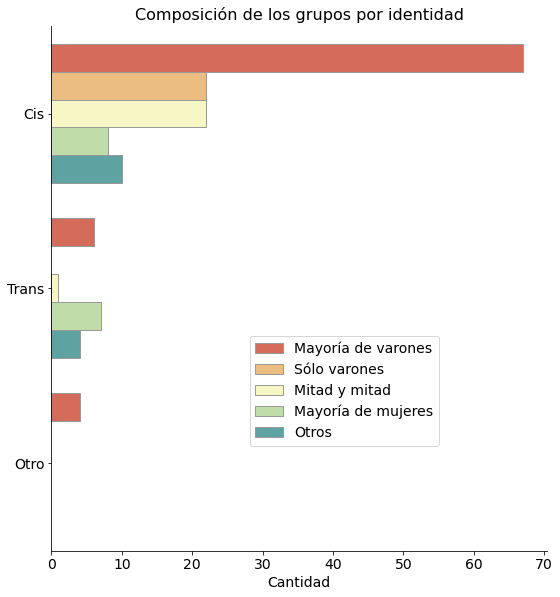

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = sns.catplot(y="identidad", hue="grupo", kind="count",
            palette="Spectral", edgecolor=".6",
            data=df1, height=8, legend=False, order=['Cis', 'Trans','Otro'])
plt.title('Composición de los grupos por identidad', fontsize=16)
plt.legend(title='', loc=(.4,.2), fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()
#plt.savefig("21.jpg",bbox_inches='tight')
#files.download("21.jpg") 

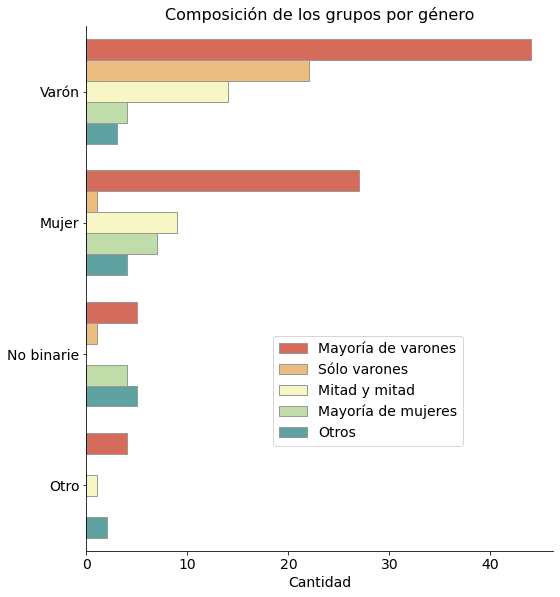

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = sns.catplot(y="genero", hue="grupo", kind="count",
            palette="Spectral", edgecolor=".6",
            data=df1, height=8, legend=False, order=['Varón', 'Mujer','No binarie','Otro'])
plt.title('Composición de los grupos por género', fontsize=16)
plt.legend(title='', loc=(.4,.2), fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()
#plt.savefig("22.jpg",bbox_inches='tight')
#files.download("22.jpg") 

##Paises

In [ ]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)


In [ ]:
paises_cuenta = (df1['residencia'].value_counts()[:].to_list())

In [ ]:
paises = (df1['residencia'].value_counts().index.to_list())
paises

['Argentina',
 'España',
 'México',
 'Chile',
 'Perú',
 'Francia',
 'Reino Unido',
 'Panamá',
 'Estados Unidos']

In [ ]:
mapa = pd.DataFrame({'lat':[-34.9,39.6,-10.3,23.8, -26.5, 8.6, 55.1, 39.7, 46.7],
                     'lon': [-65.5, -3.3,-75.4,-102.7, -71.1, -80.0, -2.9, -100.6, 1.8],
                     'paises': paises, 
                     'cant': [116,50,40,40,40,20,20,20,20]})

mapa

,lat,lon,paises,cant
0,-34.9,-65.5,Argentina,116
1,39.6,-3.3,España,50
2,-10.3,-75.4,México,40
3,23.8,-102.7,Chile,40
4,-26.5,-71.1,Perú,40
5,8.6,-80.0,Francia,20
6,55.1,-2.9,Reino Unido,20
7,39.7,-100.6,Panamá,20
8,46.7,1.8,Estados Unidos,20


In [ ]:
# add marker one by one on the map
for i in range(0,len(mapa)):
   folium.Circle(
      location=[mapa.iloc[i]['lat'], mapa.iloc[i]['lon']],
      popup=mapa.iloc[i]['paises'],
      radius=float(mapa.iloc[i]['cant']*10000),
      color='#900C3F ',
      fill=True,
      fill_color='#900C3F '
   ).add_to(m)

# Show the map again
m

##Word Cloud

In [ ]:
#comentarios = df['comentario'].dropna().to_list()
#comentarios

In [ ]:
frases = ' '.join(df['comentario'].dropna().to_list())
#frases

In [ ]:
palabras = [palabra.strip(string.punctuation) for palabra in frases.split()]

In [ ]:
contador_palabras=Counter(palabras)
palabras_ordenadas = sorted(contador_palabras.items(), key=lambda x: x[1], reverse=True)

#for i in palabras_ordenadas:
#	print(i[0], i[1])

In [ ]:
pal= ['adolescente', 'segregado','hetero','chicas','partidas','sexo','rol',
      'mesas', 'discriminación', 'personaje', 'juego', 'experiencia', 'amigos', 
      'personas','mujeres', 'grupos', 'sexual', 'varones', 'cis', 'queer', 
      'rolear','ignorancia','sexo','vida','personas','mesa', 'mujer', 'hombres',
      'mundo', 'varones','jugar','orientación', 'pregunta', 'género', 'confianza', 
      'inclusivo', 'alguien','confianza', 'Creo', 'sé', 'uso','interpretar',
      'distinto', 'medio','parte','falta','grupo','gente','mesa']

palabras_filtradas = {}
for key, value in contador_palabras.items():
    if (key in pal):
        palabras_filtradas[key] = value

#print(palabras_filtradas)

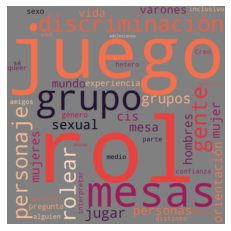

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
nube_palabras = WordCloud(width = 1000, height = 1000, colormap='rocket',
                          background_color="grey").generate_from_frequencies(palabras_filtradas)
# Display the generated image:
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
#plt.savefig("23.jpg",bbox_inches='tight')
#files.download("23.jpg") 